In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Load the data into the pandas environment and identify some basic details of the dataset

In [153]:
data=pd.read_csv('employee.csv')

In [154]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name".

In [156]:
data.set_index('name')

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [104]:
data.iloc[[2,7]]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [105]:
d1=data.loc[(data['department']=='Finance')|(data['department']=='Sales')]
d1

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [106]:
data[data['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score


In [107]:
d2=data[(data['performance_score']>500)&(data['performance_score']<700)]
d2

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [108]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [109]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [110]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

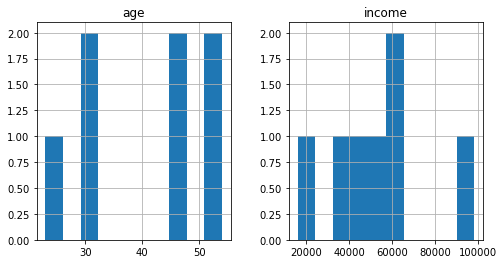

In [111]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,4))
plt.show()

In [112]:
data['age']=data['age'].fillna(data['age'].median())
data['income']=data['income'].fillna(data['income'].median())

In [113]:
data.isna().sum()

name                 0
age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [114]:
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

In [115]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Box plot of performance_score')

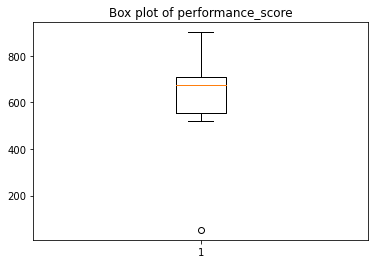

In [116]:
plt.boxplot(data['performance_score'])
plt.title("Box plot of performance_score")

In [117]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [118]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [119]:
IQR=Q3-Q1

In [120]:
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print(low_lim)
print(Up_lim)

323.5
943.5


In [121]:
outlier=[]
for x in data['performance_score']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)

In [122]:
outlier

[53]

In [123]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Int64Index([6], dtype='int64')

In [124]:
data.drop([6],inplace=True)

Text(0.5, 1.0, 'Box plot of performance_score')

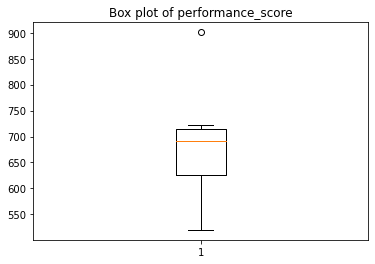

In [125]:
plt.boxplot(data['performance_score'])
plt.title("Box plot of performance_score")

In [126]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [129]:
pd.get_dummies(data, columns=['gender'], drop_first=True)

,name,age,income,department,grade,performance_score,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,0
1,S Kumar,45.0,16000.0,Finance,G0,520,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
5,Satyam Sharma,45.0,62000.0,Sales,G3,649,0
7,Josh Wills,54.0,52000.0,Finance,G3,901,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,1


# 10.Do the standard scaling on the feature performance score.

In [132]:
X=data['performance_score']
X

0    723
1    520
2    674
3    556
4    711
5    649
7    901
8    709
Name: performance_score, dtype: int64

In [133]:
X.describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [134]:
type(X)

pandas.core.series.Series

In [137]:
array=np.array(data['performance_score']).reshape(-1,1)
array

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [901],
       [709]], dtype=int64)

In [139]:
from sklearn import preprocessing

In [147]:
standardisation=preprocessing.StandardScaler()
scaled_performancetest=standardisation.fit_transform(array)

In [148]:
scaled_performancetest=pd.DataFrame(scaled_performancetest,columns=['performance_score'],index=data['name'])
scaled_performancetest

,performance_score
name,
Allen Smith,0.392262
S Kumar,-1.475872
Jack Morgan,-0.058667
Ying Chin,-1.144578
Dheeraj Patel,0.281831
Satyam Sharma,-0.288733
Josh Wills,2.030331
Leo Duck,0.263425


In [149]:
scaled_performancetest.describe()

,performance_score
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
